# Tarea - Caminata aleatoria y simulación montecarlo

Mónica Santiago Hernández

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [56]:
import numpy as np
import random

In [57]:
dif_t = 0.001
Xi = [-1,1]

def mov_browniano (n):
    wi = [0]
    for i in range (n):
        resultado = wi[-1] + random.choice(Xi)*np.sqrt(dif_t)
        wi.append(resultado)
    return wi

In [58]:
resultados = mov_browniano(10)

In [59]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

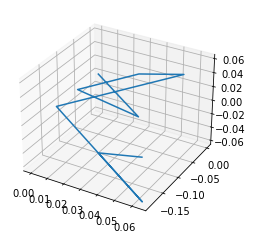

In [60]:
figura = plt.figure()
ax1 = figura.add_subplot(111,projection='3d')
x = np.array([mov_browniano(10)])
y = np.array([mov_browniano(10)])
z = np.array([mov_browniano(10)])

ax1.plot_wireframe(x,y,z)

plt.show

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [61]:
import random
import matplotlib.pyplot as plt

In [62]:
moneda = [-1,1]

In [63]:
def juego():
    estatus = random.choice(moneda)
    ganaste = True
    if estatus == 1:
        return ganaste
    else:
        ganaste = False
        return ganaste

In [64]:
def apostador(C0=20):
    c = [C0]
    while c[-1] > 0:
        ganador = juego()
        if c[-1] >=6:
            apuesta = c[-1]/2
            if ganador == True :
                c.append(c[-1]+apuesta)
            else:
                c.append(c[-1]-apuesta)
        elif c[-1] < 6 :
            apuesta = 2
            
            if ganador == True :
                c.append(c[-1]+apuesta)
            else:
                c.append(c[-1]-apuesta)
        else:
            break
    return c

In [78]:
apostador()

[20, 10.0, 15.0, 7.5, 11.25, 5.625, 3.625, 1.625, 3.625, 1.625, -0.375]

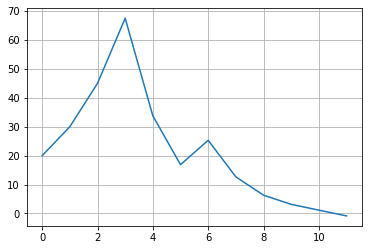

In [79]:
plt.figure()
plt.plot(apostador())
plt.grid()

In [80]:
def apostador_2(C0=20):
    c = [C0]
    juegos = 0
    while c[-1] > 0:
        ganador = juego()
        if c[-1] >=6:
            apuesta = c[-1]/2
            if ganador == True :
                c.append(c[-1]+apuesta)
                juegos += 1
            else:
                c.append(c[-1]-apuesta)
                juegos += 1
        elif c[-1] < 6 :
            apuesta = 2
            
            if ganador == True :
                c.append(c[-1]+apuesta)
                juegos += 1
            else:
                c.append(c[-1]-apuesta)
                juegos += 1
        else:
            break
    return juegos

In [81]:
apostadores = []

for i in range (10000):
    apostadores.append(apostador_2())
    
np.mean(apostadores)

26.5821

Se necesitan aproximadamente 26 juegos para que los 10,000 apostadores se queden en quiebra

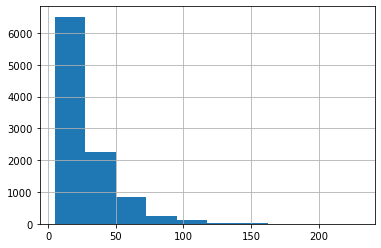

In [82]:
plt.figure()
plt.hist(apostadores)
plt.grid()